In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # for encodeing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # for decision tree object
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA - Exploratory Data Analysis

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.shape

(150, 5)

In [5]:
iris.isnull().any()
# iris.isnull().sum()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

#### Visualizing the attributes all at once

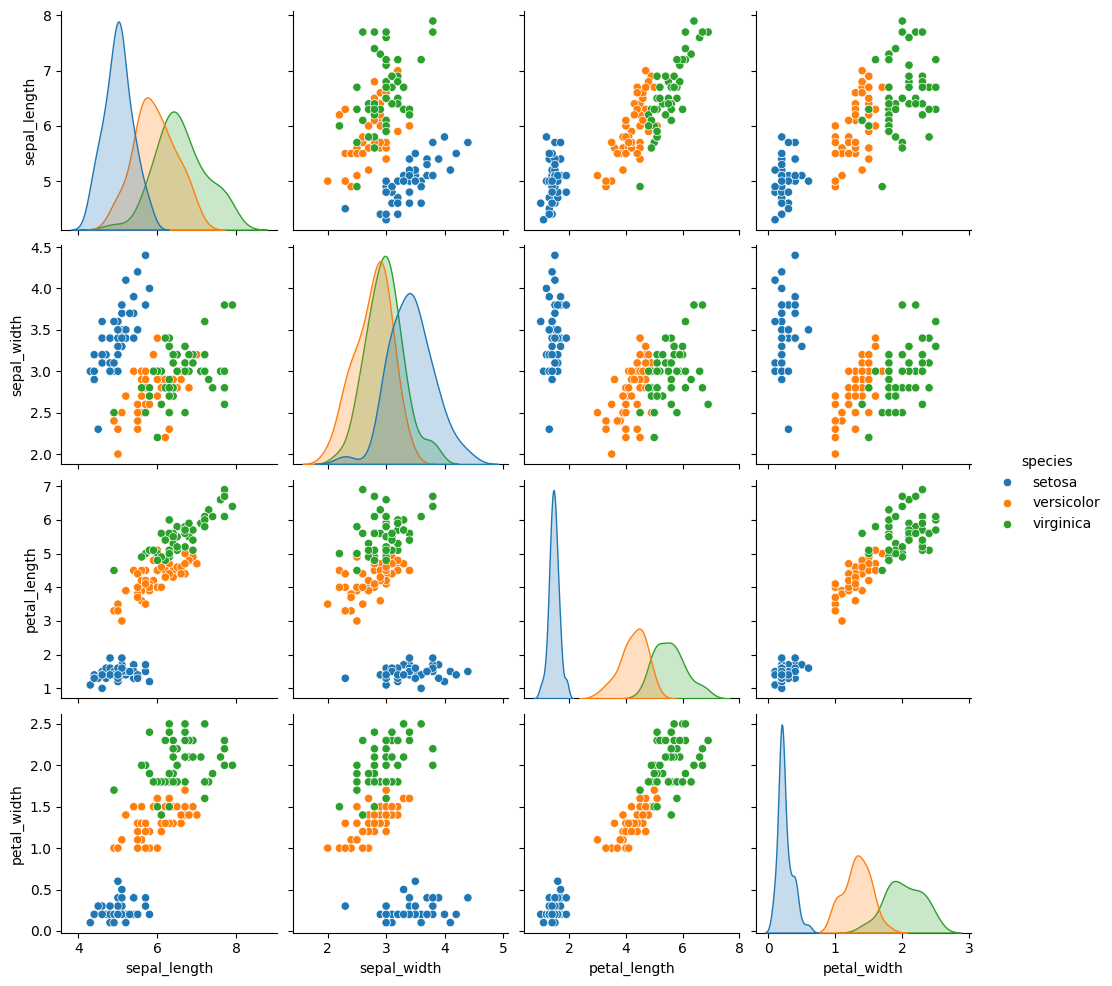

In [6]:
sns.pairplot(data=iris, hue='species')

In [7]:
# correlation matrix
correlation_matrix = iris.drop('species', axis=1).corr()
correlation_matrix.head()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

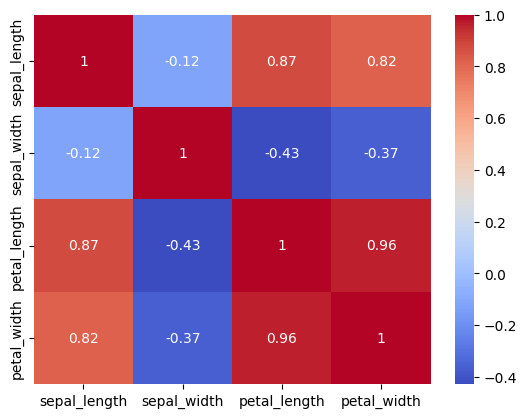

In [8]:
# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Seperating Feature and target Variables

In [9]:
target = iris['species'] #dependent variable

iris_copy = iris.copy()
iris_copy = iris.drop('species', axis=1)

X = iris_copy # independent variable

### Encoding to convert them in categorial form

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
y = target

### Train and Test Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining Decision Tree Algorithm

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predicting the value of test data

In [13]:
prediction = dtree.predict(X_test)

In [14]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
confusion_matrix(y_test, prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

1.0

## Ploting Tree

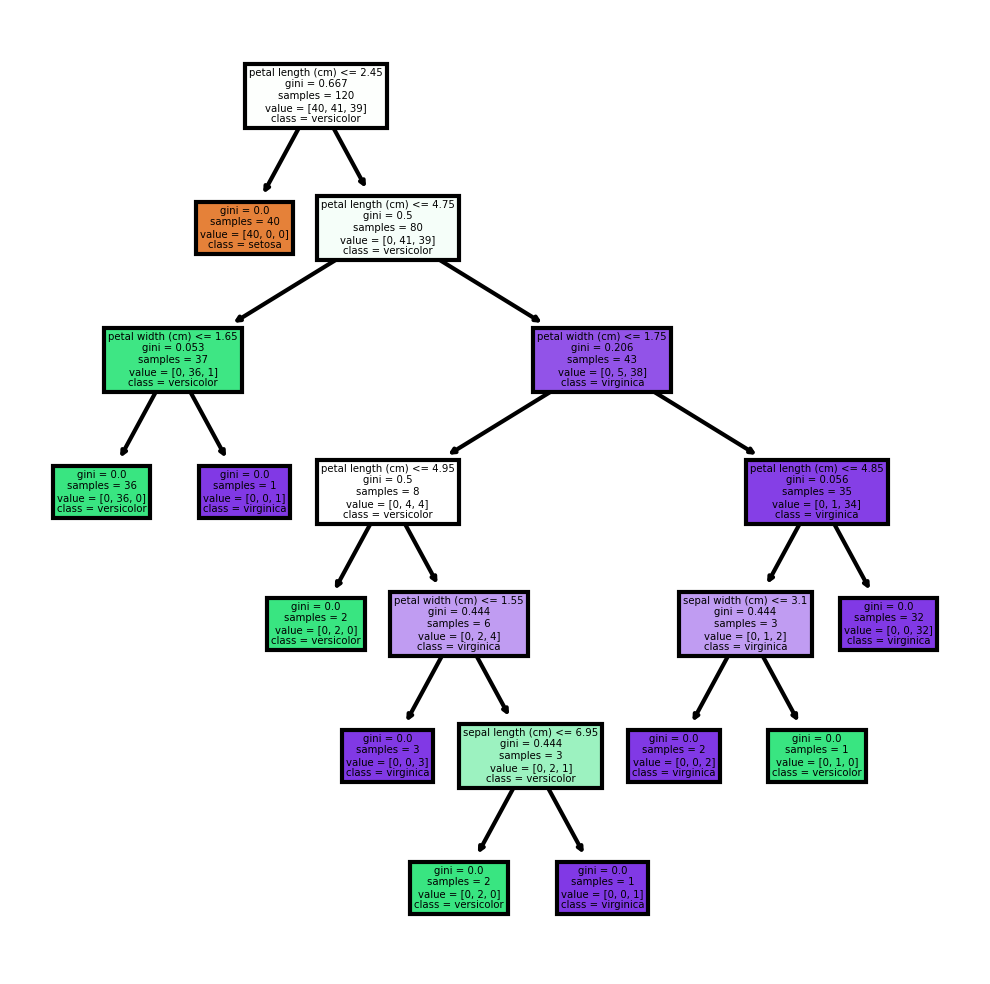

In [17]:
from sklearn import tree

fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(dtree, feature_names = fn, class_names = cn, filled = True)

plt.savefig("IrisData_DecisionTree.png")